In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## __Задание:__
## Проанализируйте тест между группами 0 и 3 по метрике линеаризованных лайков. Видно ли отличие? Стало ли 𝑝-𝑣𝑎𝑙𝑢𝑒 меньше? Проанализируйте тест между группами 1 и 2 по метрике линеаризованных лайков. Видно ли отличие? Стало ли 𝑝-𝑣𝑎𝑙𝑢𝑒 меньше?

In [2]:
dir_path = '~/data_files/'
df = pd.read_csv(dir_path + 'linearized_likes_ab_test_data.zip', compression='zip')

df.head()

,exp_group,user_id,likes,views
0,3,115383,9,30
1,1,18392,7,32
2,3,123580,13,48
3,2,131473,14,134
4,2,32420,26,128


In [3]:
# Рассчитываем значение CTR.

df['ctr'] = round(df.likes / df.views, 3)
df.head()

,exp_group,user_id,likes,views,ctr
0,3,115383,9,30,0.300
1,1,18392,7,32,0.219
2,3,123580,13,48,0.271
3,2,131473,14,134,0.104
4,2,32420,26,128,0.203


In [4]:
# Взглянем на CTR и количество пользователей во всех группах.

df.groupby('exp_group').agg({'user_id':'count','ctr':'mean'})

,user_id,ctr
exp_group,,
0,9999,0.215945
1,10079,0.215604
2,9952,0.214407
3,10049,0.232621


In [5]:
# Сделаем графики в seaborn покрупнее.

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [6]:
# Разделим датафрейм на отдельные тестовые группы.

group1 = df[df.exp_group == 1].copy()
group2 = df[df.exp_group == 2].copy()
group0 = df[df.exp_group == 0].copy()
group3 = df[df.exp_group == 3].copy()

In [7]:
# Определим общий CTR в контрольной группе 1.

CTRcontrol_g1 = sum(group1.likes) / sum(group1.views)
CTRcontrol_g1

0.20802680490126244

In [8]:
# Определим общий CTR в контрольной группе 0.

CTRcontrol_g0 = sum(group0.likes) / sum(group0.views)
CTRcontrol_g0

0.20823612262916305

In [9]:
# Посчитаем метрику линеаризованных лайков в контрольной группе 1.

group1['linearized_likes'] = group1.likes - CTRcontrol_g1*group1.views

In [10]:
# Посчитаем метрику линеаризованных лайков в тестовой группе 2.

group2['linearized_likes'] = group2.likes - CTRcontrol_g1*group2.views

Text(0, 0.5, '')

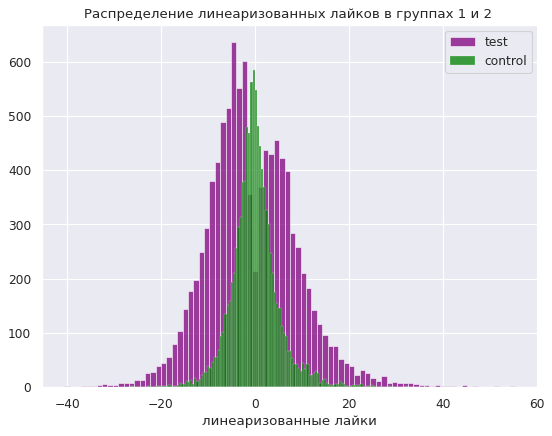

In [13]:
# Построим распределение линеаризованных лайков в группах 1 и 2.

plt.figure(figsize=(8, 6), dpi=80)

sns.histplot(group2.linearized_likes, color='purple')
sns.histplot(group1.linearized_likes, color='green')
plt.legend(labels=['test', 'control'])
plt.title('Распределение линеаризованных лайков в группах 1 и 2')
plt.xlabel('линеаризованные лайки')
plt.ylabel('')


Text(0, 0.5, '')

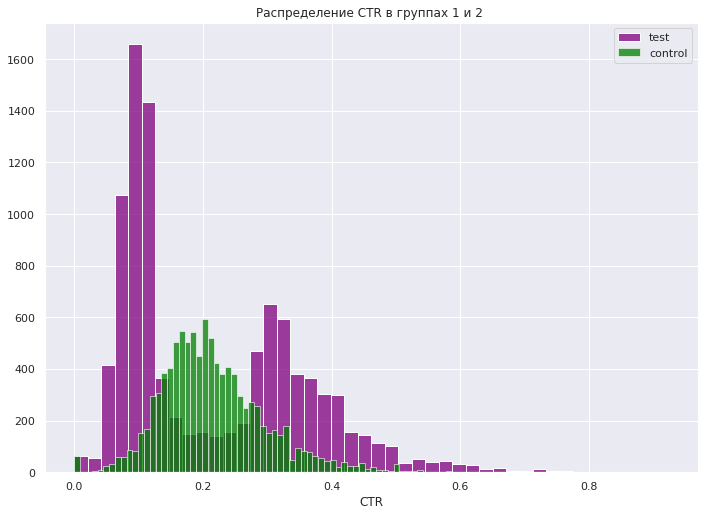

In [14]:
# Построим распределение CTR в группах 1 и 2.

sns.histplot(group2.ctr, color='purple')
sns.histplot(group1.ctr, color='green')
plt.legend(labels=['test', 'control'])
plt.title('Распределение CTR в группах 1 и 2')
plt.xlabel('CTR')
plt.ylabel('')


In [15]:
# Посчитаем метрику линеаризованных лайков в контрольной группе 0.

group0['linearized_likes'] = group0.likes - CTRcontrol_g0*group0.views

In [16]:
# Посчитаем метрику линеаризованных лайков в тестовой группе 3.

group3['linearized_likes'] = group3.likes - CTRcontrol_g0*group3.views

Text(0, 0.5, '')

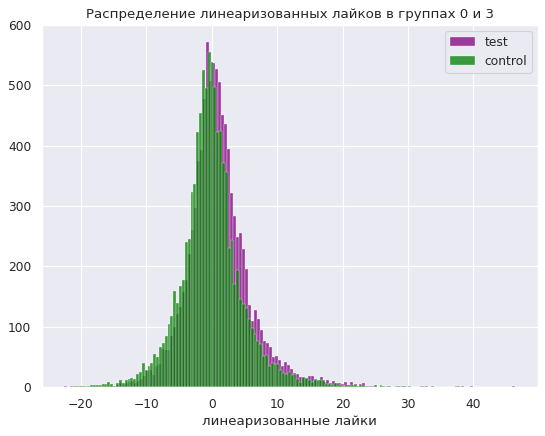

In [18]:
# Построим распределение линеаризованных лайков в группах 0 и 3.

sns.histplot(group3.linearized_likes, color='purple')
sns.histplot(group0.linearized_likes, color='green')
plt.legend(labels=['test', 'control'])
plt.title('Распределение линеаризованных лайков в группах 0 и 3')
plt.xlabel('линеаризованные лайки')
plt.ylabel('')

Text(0, 0.5, '')

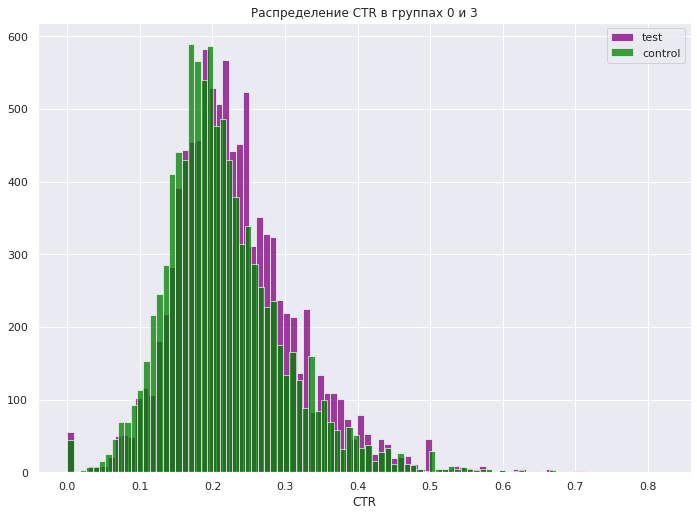

In [19]:
# Построим распределение CTR в группах 0 и 3.

sns.histplot(group3.ctr, color='purple')
sns.histplot(group0.ctr, color='green')
plt.legend(labels=['test', 'control'])
plt.title('Распределение CTR в группах 0 и 3')
plt.xlabel('CTR')
plt.ylabel('')

In [20]:
# Проведём сравнение линеаризованных лайков в группах 1 и 2 t-тестом.

_, pval_t_ll = stats.ttest_ind(group1.linearized_likes,
                group2.linearized_likes,
                equal_var=False)

print('Полученное в результате проведения t-теста значение p-value =', pval_t_ll)

Полученное в результате проведения t-теста значение p-value = 9.439432187037644e-10


In [21]:
# Проведём сравнение линеаризованных лайков в группах 1 и 2 тестом Манна-Уитни.

_, pval_u_ll = stats.mannwhitneyu(group1.linearized_likes,
                group2.linearized_likes,
                alternative='two-sided')

print('Полученное в результате проведения теста Манна-Уитни значение p-value =', pval_u_ll)

Полученное в результате проведения теста Манна-Уитни значение p-value = 9.404319579641738e-27


In [22]:
# Проведём сравнение CTR в группах 1 и 2 t-тестом.

_, pval_t_ctr = stats.ttest_ind(group1.ctr,
                group2.ctr,
                equal_var=False)

print('Полученное в результате проведения t-теста значение p-value =', pval_t_ctr)

Полученное в результате проведения t-теста значение p-value = 0.4738007466000528


In [23]:
# Проведём сравнение CTR в группах 1 и 2 тестом Манна-Уитни.

_, pval_u_ctr = stats.mannwhitneyu(group1.ctr,
                group2.ctr,
                alternative='two-sided')

print('Полученное в результате проведения теста Манна-Уитни значение p-value =', pval_u_ctr)

Полученное в результате проведения теста Манна-Уитни значение p-value = 6.145564141609496e-56


### На основании проведённых выше в группах 1 и 2 t-теста и теста Манна-Уитни для сравнения распределений линеаризованных лайков, а также распределений CTR, можно сделать вывод о том, что метод внедрения линеаризованных лайков вместо ratio-метрики CTR позволил верно отклонить нулевую гипотезу о равенстве расределений тестовой и контрольной групп (p-value оказалось очень близко к 0). Благодаря использованию этого метода удалось избежать ошибки 2 рода, в то время как сравнение CTR в случае с t-тестом выдаёт слишком большое значение p-value и происходит ошибка 2 рода. Тест Манна-Уитни же выдаёт корректный результат и при сравнении линеаризованных лайков, и при сравнении CTR. Подобный промах t-теста при сравнении CTR связан с тем, что в группах 1 и 2 распределения CTR не похожи друг на друга и распределение CTR в тестовой группе 2 не является близким к нормальному (имеет 2 пика, скошенность и выбросы). Поэтому лишь тест Манна-Уитни смог корректно отработать в обоих случаях, а t-тесту дал верный результат только при сравнении линеаризованных лайков.

In [24]:
# Проведём сравнение линеаризованных лайков в группах 0 и 3 t-тестом.

_, pval_t_ll = stats.ttest_ind(group0.linearized_likes,
                group3.linearized_likes,
                equal_var=False)

print('Полученное в результате проведения t-теста значение p-value =', pval_t_ll)

Полученное в результате проведения t-теста значение p-value = 5.4914249479690016e-52


In [25]:
# Проведём сравнение линеаризованных лайков в группах 0 и 3 тестом Манна-Уитни.

_, pval_u_ll = stats.mannwhitneyu(group0.linearized_likes,
                group3.linearized_likes,
                alternative='two-sided')

print('Полученное в результате проведения теста Манна-Уитни значение p-value =', pval_u_ll)

Полученное в результате проведения теста Манна-Уитни значение p-value = 1.1517315029786597e-63


In [26]:
# Проведём сравнение CTR в группах 0 и 3 t-тестом.

_, pval_t_ctr = stats.ttest_ind(group0.ctr,
                group3.ctr,
                equal_var=False)

print('Полученное в результате проведения t-теста значение p-value =', pval_t_ctr)

Полученное в результате проведения t-теста значение p-value = 1.0406666136759498e-43


In [27]:
# Проведём сравнение CTR в группах 0 и 3 тестом Манна-Уитни.

_, pval_u_ctr = stats.mannwhitneyu(group0.ctr,
                group3.ctr,
                alternative='two-sided')

print('Полученное в результате проведения теста Манна-Уитни значение p-value =', pval_u_ctr)

Полученное в результате проведения теста Манна-Уитни значение p-value = 1.1877150321853489e-57


### На основании проведённых выше в группах 0 и 3 t-теста и теста Манна-Уитни для сравнения распределений линеаризованных лайков, а также распределений CTR, можно сделать вывод о том, что метод внедрения линеаризованных лайков вместо ratio-метрики CTR не отразился на интерпертации результатов (p-value оказалось очень близко к 0 и при сравнении линеаризованных лайков, и при сравнении CTR). Это связано с тем, что в группах 0 и 3 распределения CTR были похожи друг на друга и близки к нормальным, в отличие от того, что было в группах 1 и 2. В результате мы в обоих случаях верно отклонили нулевую гипотезу о равенстве расределений тестовой и контрольной групп.

In [28]:
# Сравним средние значения линеаризованных лайков в группах 1 и 2, чтобы определить направление изменения тестовой группы
# по сравнению с контрольной.

avg_linearized_likes_group1 = group1.linearized_likes.mean()
avg_linearized_likes_group2 = group2.linearized_likes.mean()
if avg_linearized_likes_group2 > avg_linearized_likes_group1:
    print('Среднее значение линеаризованных лайков в тестовой группе 2 больше, чем в контрольной группе 1 на',
          avg_linearized_likes_group2 - avg_linearized_likes_group1)
else:
    print('Среднее значение линеаризованных лайков в контрольной группе 1 больше, чем в тестовой группе 2 на',
          avg_linearized_likes_group1 - avg_linearized_likes_group2)

Среднее значение линеаризованных лайков в контрольной группе 1 больше, чем в тестовой группе 2 на 0.65927712364852


In [29]:
# Сравним средние значения линеаризованных лайков в группах 0 и 3, чтобы определить направление изменения тестовой группы
# по сравнению с контрольной.

avg_linearized_likes_group0 = group0.linearized_likes.mean()
avg_linearized_likes_group3 = group3.linearized_likes.mean()
if avg_linearized_likes_group3 > avg_linearized_likes_group0:
    print('Среднее значение линеаризованных лайков в тестовой группе 3 больше, чем в контрольной группе 0 на',
          avg_linearized_likes_group3 - avg_linearized_likes_group0)
else:
    print('Среднее значение линеаризованных лайков в контрольной группе 0 больше, чем в тестовой группе 3 на',
          avg_linearized_likes_group0 - avg_linearized_likes_group3)

Среднее значение линеаризованных лайков в тестовой группе 3 больше, чем в контрольной группе 0 на 1.071333748065902


### На основании проведенных тестов можно сделать вывод о том, что подсчёт линеаризованных лайков вместо CTR при сравнении групп 1 и 2 уменьшил значение p-value для t-теста, позволив корректно отвергнуть нулевую гипотезу. В случае подсчёта линеаризованных лайков вместо CTR при сравнении групп 0 и 3 значение p-value для t-теста не изменилось, поскольку оно уже было достаточно маленьким (близко к 0), чтобы корректно отвергнуть нулевую гипотезу. В случае с тестом Манна-Уитни значение p-value значимо не изменилось как при сравнении групп 1 и 2, так и при сравнении групп 0 и 3, поскольку оно уже было достаточно маленьким (близко к 0).